In [1]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P3_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x222be418710>,
 'caps': [<matplotlib.lines.Line2D at 0x222be41a250>,
 'boxes': [<matplotlib.lines.Line2D at 0x222be40b790>],
 'medians': [<matplotlib.lines.Line2D at 0x222be41b950>],
 'fliers': [<matplotlib.lines.Line2D at 0x222be424550>],
 'means': []}

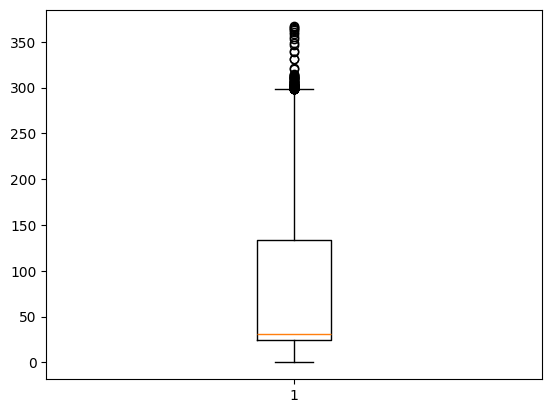

In [3]:
plt.boxplot(p4["RHeel_pos_Z"])

In [5]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  181 :  13.665
R -  305 :  16.286
R -  423 :  14.16
R -  539 :  10.098
R -  654 :  16.772
R -  769 :  20.931
R -  884 :  21.709
R -  1001 :  20.285
R -  1118 :  20.046
R -  1231 :  15.971
R -  1346 :  13.976
R -  1462 :  13.739
R -  1576 :  12.034
R -  1692 :  14.0
R -  1810 :  18.47
R -  1925 :  22.723
R -  2041 :  20.547
R -  2157 :  21.362
R -  2274 :  17.213
R -  2391 :  13.497
R -  2508 :  15.486
R -  2627 :  11.882
R -  2758 :  10.3
R -  2898 :  15.718
R -  3050 :  21.083
R -  3187 :  19.262
R -  3323 :  20.941
R -  3453 :  19.428
R -  3585 :  14.042
R -  3717 :  14.432
R -  3852 :  13.074
R -  3983 :  10.196
R -  4121 :  12.655
R -  4259 :  19.015
R -  4395 :  21.909
R -  4532 :  20.286
R -  4666 :  20.626
R -  4791 :  18.173
R -  4910 :  14.591
R -  5030 :  16.158
R -  5151 :  13.631
R -  5269 :  10.272
R -  5388 :  14.939
R -  5519 :  20.1
R -  5637 :  22.282
R -  5754 :  20.677
R -  5888 :  19.98
R -  6016 :  15.752
R -  6136 :  13.326
R -  6254 :  15.696
R -  6379 :  12.

KeyError: 9777

In [6]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  153 :  21.937
L -  244 :  9.77
L -  362 :  11.777
L -  480 :  10.295
L -  592 :  12.275
L -  709 :  19.734
L -  823 :  20.602
L -  942 :  19.909
L -  1057 :  18.773
L -  1171 :  15.767
L -  1285 :  11.528
L -  1403 :  13.202
L -  1517 :  12.208
L -  1632 :  9.105
L -  1750 :  17.601
L -  1866 :  19.622
L -  1984 :  20.85
L -  2097 :  21.669
L -  2213 :  18.504
L -  2332 :  14.591
L -  2447 :  11.257
L -  2564 :  12.415
L -  2691 :  9.248
L -  2827 :  14.486
L -  2974 :  18.5
L -  3117 :  19.677
L -  3252 :  21.074
L -  3385 :  19.192
L -  3519 :  15.894
L -  3649 :  10.362
L -  3783 :  13.629
L -  3919 :  10.545
L -  4052 :  9.949
L -  4191 :  18.143
L -  4326 :  19.179
L -  4461 :  20.69
L -  4597 :  20.736
L -  4726 :  17.985
L -  4848 :  15.003
L -  4967 :  11.381
L -  5088 :  12.6
L -  5208 :  10.097
L -  5329 :  12.791
L -  5452 :  18.27
L -  5576 :  20.684
L -  5695 :  20.899
L -  5817 :  20.851
L -  5949 :  16.967
L -  6074 :  14.212
L -  6193 :  11.614
L -  6315 :  12.809


KeyError: 9777

In [7]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [8]:
steps = pd.DataFrame(steps)
steps

,0,1
0,153,21.937
1,181,13.665
2,244,9.770
3,305,16.286
4,362,11.777
...,...,...
149,9389,18.851
150,9450,14.226
151,9516,13.568
152,9581,8.529


In [9]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [10]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [11]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [12]:
start_music[start_music[0]=='P3_M2'][1].item()

5174.0

In [13]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P3_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P3_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P3_M3'][1].item()

In [14]:
m2

,0,1
1,5359.179138,80.7495BPM
2,5433.482993,80.7495BPM
3,5507.786848,80.7495BPM
4,5582.090703,80.7495BPM
5,5658.716553,78.3026BPM
6,5734.181406,79.5072BPM
7,5809.646258,79.5072BPM
8,5885.111111,79.5072BPM
9,5958.253968,82.0313BPM
10,6032.557823,80.7495BPM


(0.0, 9800.0)

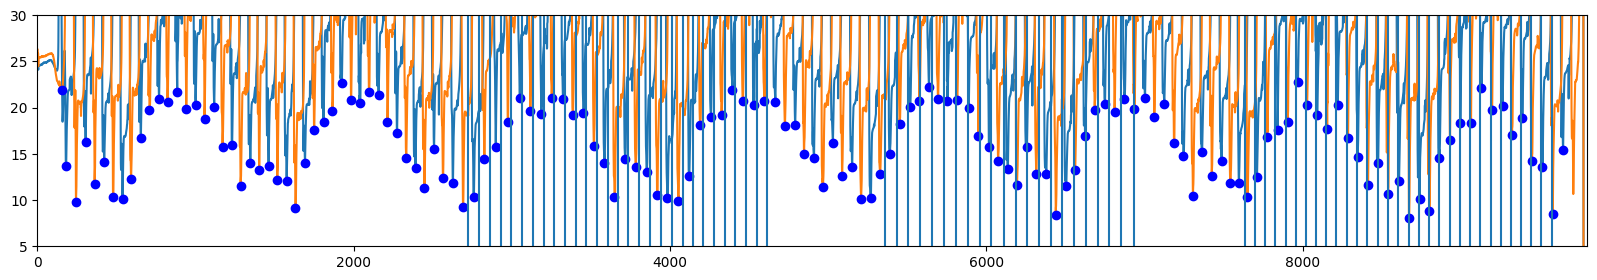

In [15]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([5, 30])
plt.xlim([0, 9800])

In [16]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

88.82941988586032

In [17]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

84.0

# P3 - M1

In [47]:
m1_start = start_music[start_music[0]=='P3_M1'][1].item()
m1_end = start_music[start_music[0]=='P3_M2'][1].item()-500
print(m1_start)
print(m1_end)

2574.0
4674.0


In [48]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [49]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100/60)

92.00189916749818

In [50]:
#all WALKING M1
steps_in_m1_range.count()/((m1_end-m1_start)/100)*60

88.57142857142858

In [51]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [52]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [53]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

92.19858156028369

In [54]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

92.7683246045788

In [55]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

89.92790678965513

In [56]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 31]

(2554.0, 4694.0)

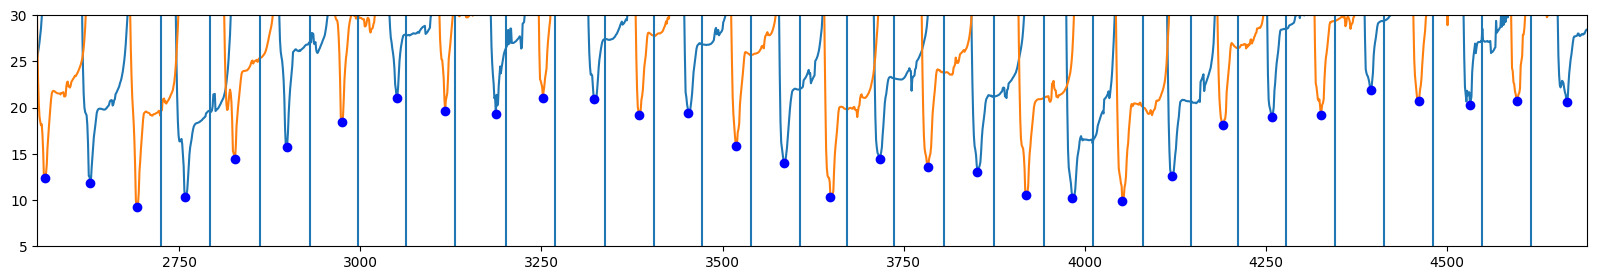

In [57]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([5, 30])
plt.xlim([m1_start-20, m1_end+20])

# P3 - M2

In [58]:
m2_start = start_music[start_music[0]=='P3_M2'][1].item()
m2_end = start_music[start_music[0]=='P3_M3'][1].item()-500
print(m2_start)
print(m2_end)

5174.0
6974.0


In [59]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [60]:
#all MUSIC M1
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [76]:
#all WALKING M2
steps_in_m2_range.count()/((m2_end-m2_start)/100)*60

96.66666666666667

In [62]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [63]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [64]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

101.62314749470713

In [65]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5154.0, 6994.0)

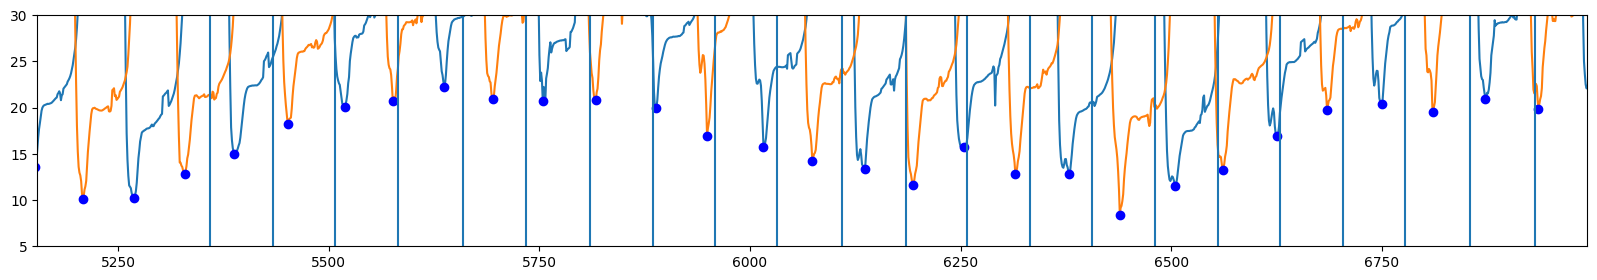

In [66]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([5, 30])
plt.xlim([m2_start-20, m2_end+20])

# P3 - M3

In [67]:
m3_start = start_music[start_music[0]=='P3_M3'][1].item()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7474.0
9575.9863946


In [68]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [69]:
#all MUSIC M1
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [70]:
#all WALKING M3
steps_in_m3_range.count()/((m3_end-m3_start)/100/60)

94.19661350266666

In [71]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [72]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [73]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

96.71641791044776

In [74]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7454.0, 9595.9863946)

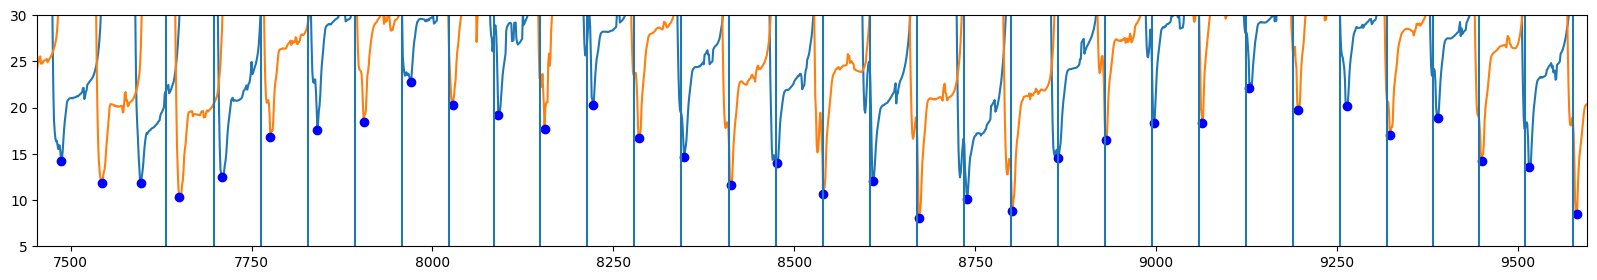

In [75]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([5, 30])
plt.xlim([m3_start-20, m3_end+20])